# run carbonation - input from class

In [78]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

from helper_func import *
from carbonation import Carbonation_Model, load_df_R_ACC


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


input year (default 50)50


/Users/gangli/Local Documents/Mitacs project spinoff/prototype_update/carbonation.py:254: RuntimeWarning: divide by zero encountered in power
  W = (t_0 / t) ** ((p_SR * ToW) ** b_w / 2.0)
/Users/gangli/Local Documents/Mitacs project spinoff/prototype_update/carbonation.py:63: RuntimeWarning: invalid value encountered in sqrt
  pars.k = (2 * pars.k_e * pars.k_c * (pars.k_t * pars.R_ACC_0_inv + pars.eps_t) * pars.C_S) ** 0.5 * pars.W_t


Pf(g = R-S < 0) from various methods
    sample count: 2.0014210089163306e-05
    g integral: 1.0356229413021207e-05
    R S integral: 3.5040429613099117e-06
    beta_factor: 4.545641539287153


<IPython.core.display.Javascript object>


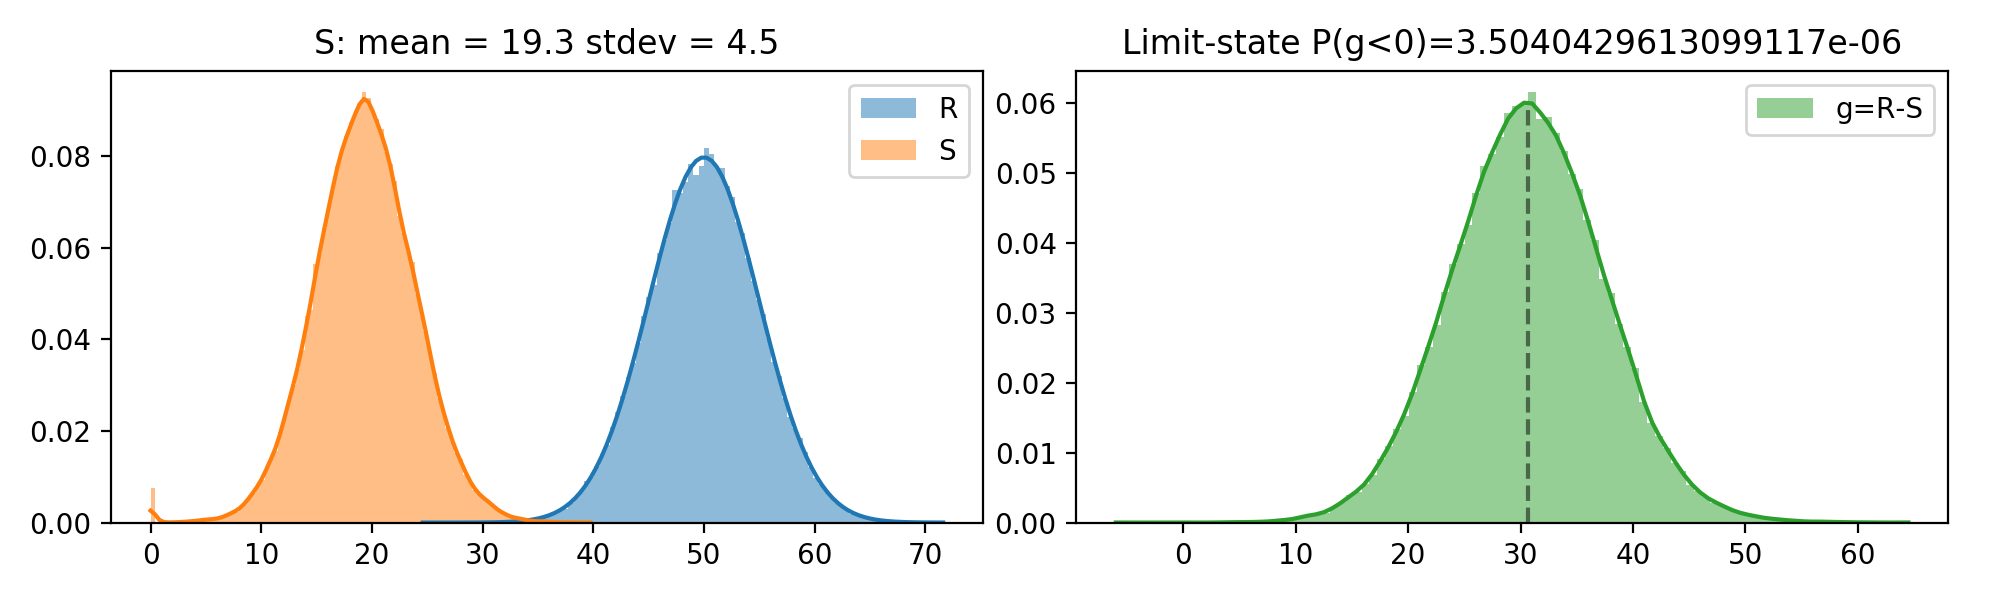

In [79]:
# Input from file
df_pars = read_input_file('data.xlsx')  # from user upload file: df that supplies parameters to pars

# Raw parameters to init Model obj
class Wrapper: pass

pars = Wrapper()  # empty class to store raw parameters

pars.cover_mean = df_pars.cover_mean.values[0]  # mm .values[0] returns a number rather than an array; number works in model.run()
pars.cover_std = df_pars.cover_std.values[0]
pars.RH_real = df_pars.RH_real.values[0]
pars.t_c = df_pars.RH_real.values[0]
pars.x_c = df_pars.x_c.values[0]  # m
pars.ToW = df_pars.ToW.values[0]
pars.p_SR = df_pars.p_SR.values[0]

pars.option = Wrapper()  # empty sub class to store a sub group of raw parameters

pars.option.choose = False                  # from boolean check in the UI
pars.option.cement_type = 'CEM_I_42.5_R+SF' # from drop down select in the UI
                                                # CEM_I_42.5_R
                                                # CEM_I_42.5_R+FA
                                                # CEM_I_42.5_R+SF
                                                # CEM_III/B_42.5
                
pars.option.wc_eqv = 0.6               
pars.option.df_R_ACC = load_df_R_ACC()  # load a df defined in carbonation.py 
pars.option.plot = True

# run model
n_year = read_input_user('input year (default 50)')
M = Carbonation_Model(pars)
M.run(n_year)    # more attributes are generated and attached to M 
M.postproc(plot=True) # this generates the plot

In [84]:
# calibration to field data
carb_depth_field = read_input_file('data_cal.xlsx')
M_cal = M.calibrate(n_year, carb_depth_field.values, print_out=True)


/Users/gangli/Local Documents/Mitacs project spinoff/prototype_update/carbonation.py:254: RuntimeWarning: divide by zero encountered in power
  W = (t_0 / t) ** ((p_SR * ToW) ** b_w / 2.0)
/Users/gangli/Local Documents/Mitacs project spinoff/prototype_update/carbonation.py:63: RuntimeWarning: invalid value encountered in sqrt
  pars.k = (2 * pars.k_e * pars.k_c * (pars.k_t * pars.R_ACC_0_inv + pars.eps_t) * pars.C_S) ** 0.5 * pars.W_t


carb_depth:
model: 
mean:27.784293298480737
std:6.121744761796389
field: 
mean:27.786204254
std:4.254877515556042


/Users/gangli/Local Documents/Mitacs project spinoff/prototype_update/carbonation.py:254: RuntimeWarning: divide by zero encountered in true_divide
  W = (t_0 / t) ** ((p_SR * ToW) ** b_w / 2.0)
/Users/gangli/Local Documents/Mitacs project spinoff/prototype_update/carbonation.py:64: RuntimeWarning: invalid value encountered in multiply
  xc_t = pars.k * t ** 0.5


<IPython.core.display.Javascript object>


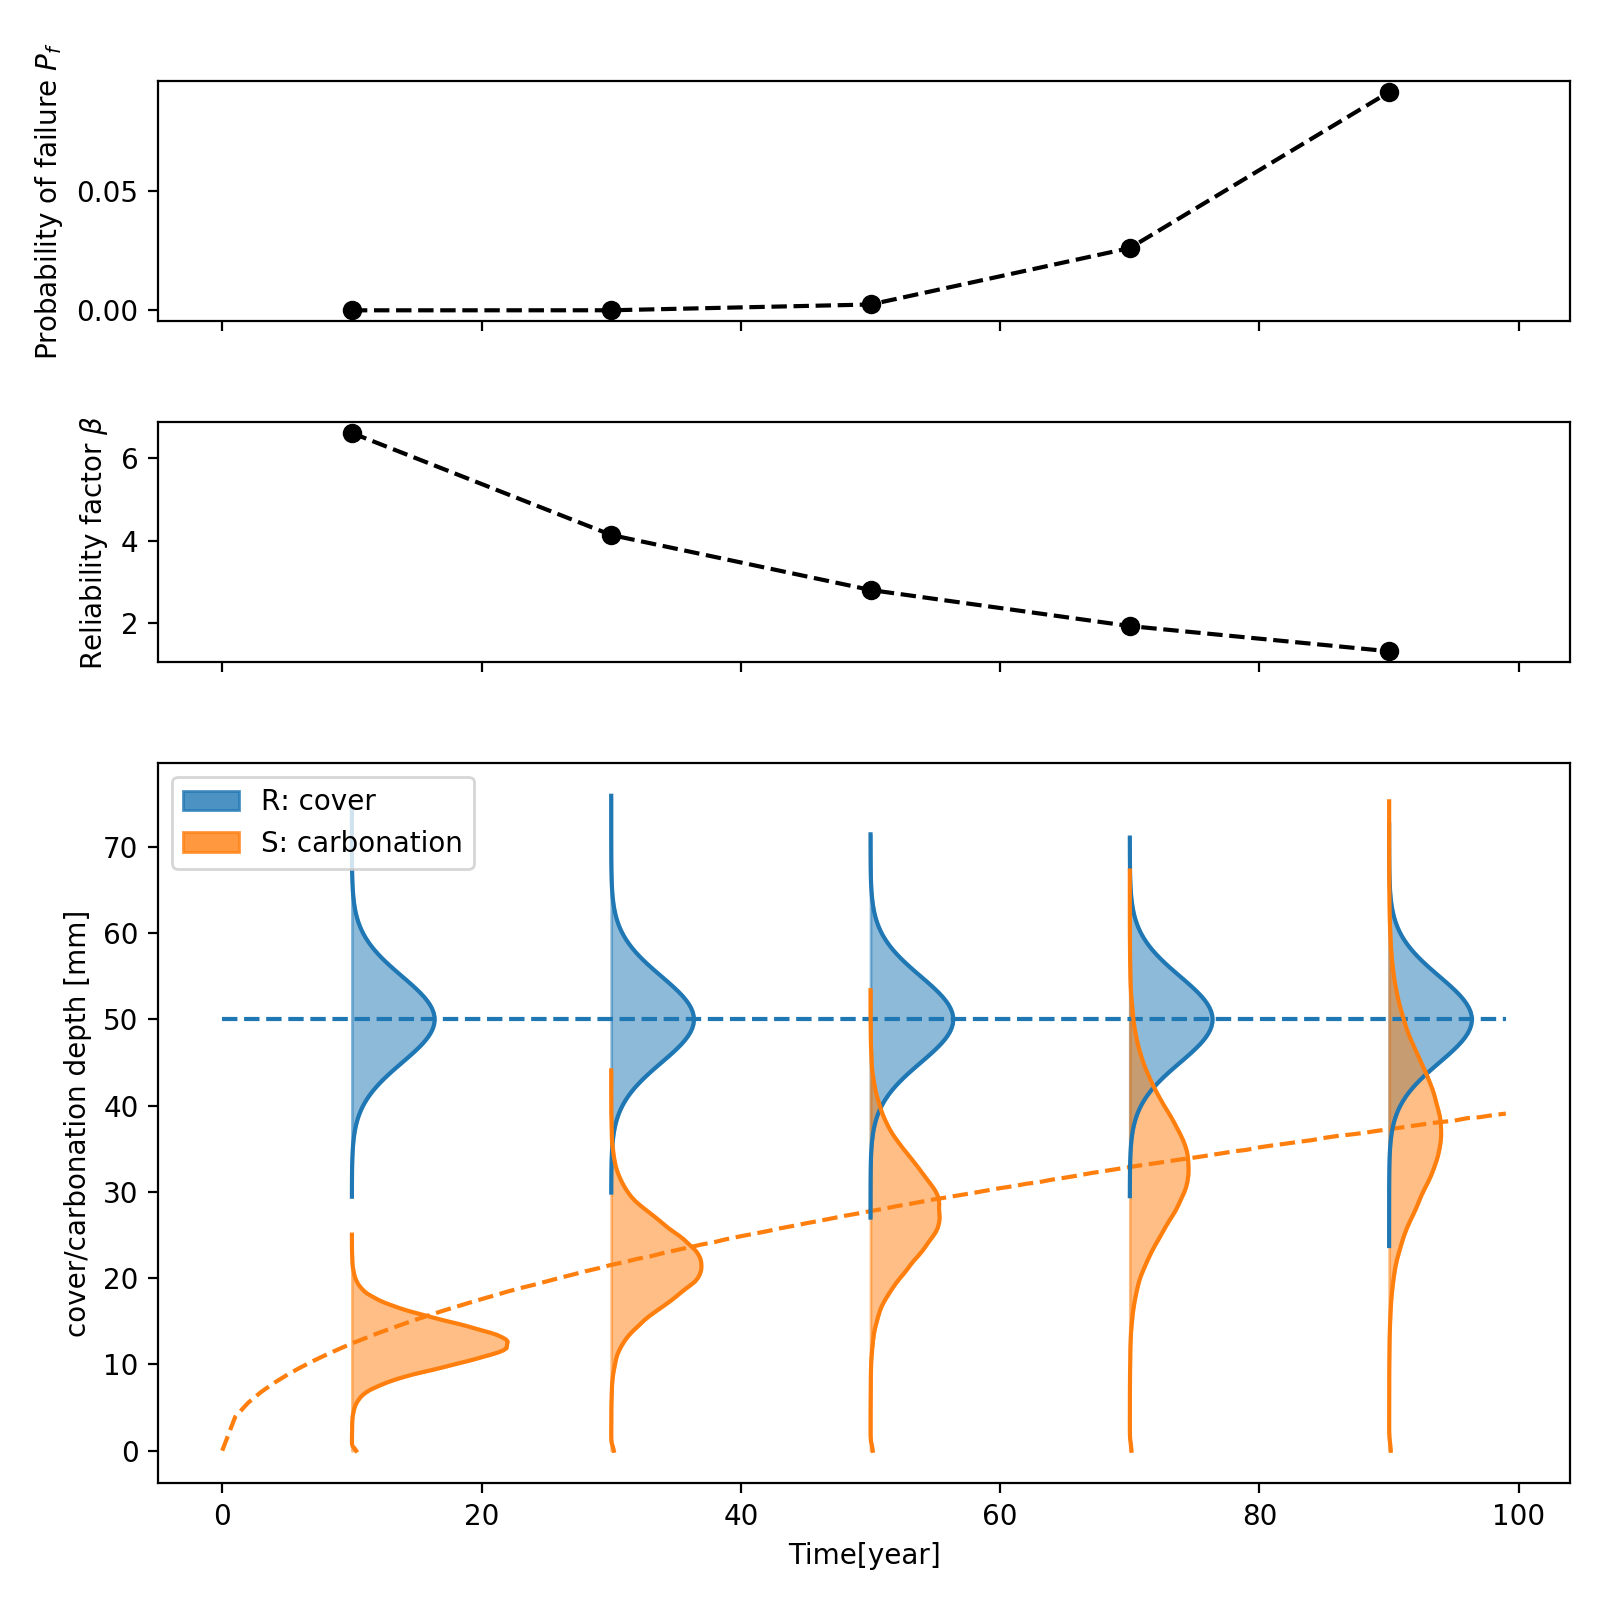

In [85]:
M_cal.report()